# Entrenamiento de EDO
Resolver:

$\dot \rho_i + 3(1+\gamma)H\rho_i = 0$

$H^2 = \frac{\kappa_0}{3}\sum \rho_i$

Cambiando variables, a:

$\Omega_i = \frac{\kappa_0 }{3H^2} \rho_i$ 

In [1]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
import random
from math import floor
from keras import models
from keras import layers
from keras import optimizers

# 1. Transformamos la EDO en una función

In [69]:
def RHS(Omega_i, lna, gamma=0):
    #x, y, z, H = Omega_i
    x, y, z = Omega_i
    pi = 3*x + 4*y
    #return [x*(-3 + pi), y*(-4 + pi), z*pi, -0.5*H*pi]
    return [x*(-3 + pi), y*(-4 + pi), z*pi]

def EDO(t,Or,Om,Ol):
    #t,Or,Om,Ol=X
    H0 = 70.
    y0 = [Om, Or, Ol]
    result = odeint(RHS, y0, t)
    return result

def split(X,Y,porcent): #El porcentaje debe estar dado entre 0 y 1
    n=floor(porcent*len(X))
    index=random.sample(range(len(X)),n)
    X_learn=[]
    Y_learn=[]
    for i in index:
        X_learn.append(X[i])
        Y_learn.append(Y[i])
    X_val=np.delete(X,index, axis=0)
    Y_val=np.delete(Y,index, axis=0)
    
    X_learn=np.array(X_learn)
    Y_learn=np.array(Y_learn)
    
    return X_learn,Y_learn,X_val,Y_val

# 2. Gneramos el conjunto de datos 
Con las suficientes convinaciones de $\Omega _i$ como para que el algrtimo aprenda
Vamos a variar 

$O_r \in [0.001, 0.0001]$

$O_m \in [0.1, 0.9]$

$O_l = 1. - O_r - O_m$

$t \in [0,-12]$

In [31]:
O_r=np.linspace(0.001,0.0001,10)
O_m=np.linspace(0.1,0.9,10)
O_l=1-O_r-O_m
T=np.linspace(0,-12,10)
T=T.reshape(10,1)

In [91]:
X0=[]
Y0=[]
for t in T:
    for Or in O_r:
        for Om in O_m:
            for Ol in O_l:
                X0.append([t,Or,Om,Ol])
                Y0.append(EDO(t,Or,Om,Ol))
                #EDO(t,0.001,.8,0.2)
               
                
X0=np.array(X0)
Y0=np.array(Y0)
X0=np.squeeze(X0)
Y0=np.squeeze(Y0)
X0 = X0.astype('float64')

<ipython-input-91-7e697ae7dc8f>:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  X0=np.array(X0)


# Creamos la Red Neuronal que trabajará estos datos


Epoch 1/150
2000/2000 [==============================] - 2s 702us/step - loss: 0.0307 - val_loss: 0.0013
Epoch 2/150
2000/2000 [==============================] - 1s 633us/step - loss: 0.0011 - val_loss: 0.0032
Epoch 3/150
2000/2000 [==============================] - 1s 682us/step - loss: 7.7932e-04 - val_loss: 2.2737e-04
Epoch 4/150
2000/2000 [==============================] - 1s 634us/step - loss: 6.3152e-04 - val_loss: 2.8037e-04
Epoch 5/150
2000/2000 [==============================] - 1s 676us/step - loss: 5.3474e-04 - val_loss: 2.1964e-04
Epoch 6/150
2000/2000 [==============================] - 1s 734us/step - loss: 4.7751e-04 - val_loss: 3.9047e-04
Epoch 7/150
2000/2000 [==============================] - 1s 712us/step - loss: 4.2406e-04 - val_loss: 0.0014
Epoch 8/150
2000/2000 [==============================] - 1s 643us/step - loss: 3.9792e-04 - val_loss: 1.5086e-04
Epoch 9/150
2000/2000 [==============================] - 1s 669us/step - loss: 3.6395e-04 - val_loss: 4.2214e-04
Epo

2000/2000 [==============================] - 1s 592us/step - loss: 1.2721e-04 - val_loss: 1.8782e-04
Epoch 74/150
2000/2000 [==============================] - 1s 592us/step - loss: 1.2869e-04 - val_loss: 4.4048e-05
Epoch 75/150
2000/2000 [==============================] - 1s 593us/step - loss: 1.2811e-04 - val_loss: 1.3752e-04
Epoch 76/150
2000/2000 [==============================] - 1s 599us/step - loss: 1.2565e-04 - val_loss: 5.2776e-05
Epoch 77/150
2000/2000 [==============================] - 1s 717us/step - loss: 1.2238e-04 - val_loss: 1.2502e-04
Epoch 78/150
2000/2000 [==============================] - 2s 760us/step - loss: 1.2326e-04 - val_loss: 4.2160e-05
Epoch 79/150
2000/2000 [==============================] - 1s 671us/step - loss: 1.2436e-04 - val_loss: 1.3084e-04
Epoch 80/150
2000/2000 [==============================] - 1s 642us/step - loss: 1.2130e-04 - val_loss: 2.1053e-05
Epoch 81/150
2000/2000 [==============================] - 1s 652us/step - loss: 1.2077e-04 - val_loss

2000/2000 [==============================] - 1s 611us/step - loss: 1.0603e-04 - val_loss: 1.0769e-04
Epoch 145/150
2000/2000 [==============================] - 1s 608us/step - loss: 1.0751e-04 - val_loss: 1.2428e-04
Epoch 146/150
2000/2000 [==============================] - 1s 626us/step - loss: 1.0617e-04 - val_loss: 8.5767e-05
Epoch 147/150
2000/2000 [==============================] - 1s 625us/step - loss: 1.0690e-04 - val_loss: 7.9385e-05
Epoch 148/150
2000/2000 [==============================] - 1s 648us/step - loss: 1.0616e-04 - val_loss: 5.9658e-05
Epoch 149/150
2000/2000 [==============================] - 1s 616us/step - loss: 1.0478e-04 - val_loss: 1.0692e-04
Epoch 150/150
2000/2000 [==============================] - 1s 600us/step - loss: 1.0402e-04 - val_loss: 1.2418e-04


Text(0.5, 1.0, 'Error durante el entrenamiento')

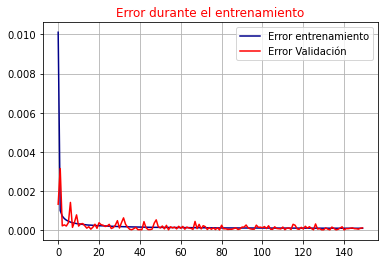

In [175]:
#Dos paredes ocultas


nodos=50
split_size=0.8
learning_rate=0.01
epocas=150

#Separamos los datos en validación y entrenamiento
X_learn,Y_learn,X_val,Y_val=split(X0,Y0,split_size)

#Armamos el modelo con estructura 'Sequential'
model=models.Sequential()

#la primer capa recibe un numero solamente, usaremos sigmoide como función de activación para la capa oculta
capa1=layers.Dense(nodos, input_shape=(4,),use_bias=1,activation='sigmoid')
capa2=layers.Dense(nodos,use_bias=1,activation='sigmoid')

#para la capa de salida usamos Id como activación
salida=layers.Dense(3,use_bias=1)

#armamos el modelo
model.add(capa1)
model.add(capa2)
model.add(salida)
#Ahora definimos el paso de compilación, con learning rate=0.001
#Función de error cuadrático medio


model.compile(optimizer=optimizers.RMSprop(lr=learning_rate), loss='mse')

#por último traemos los datos de entrenamiento y los procesamos con 'fit()'
history=model.fit(X_learn,Y_learn,validation_data=(X_val, Y_val),batch_size=4,epochs=epocas,shuffle=True)

error=history.history['loss']
exac=history.history['val_loss']
epochs=np.arange(0,len(error))
plt.plot(epochs,error,label='Error entrenamiento',color='darkblue')
plt.plot(epochs,exac,label='Error Validación',color='r')
plt.legend()
plt.grid()
plt.title('Error durante el entrenamiento',color='red')

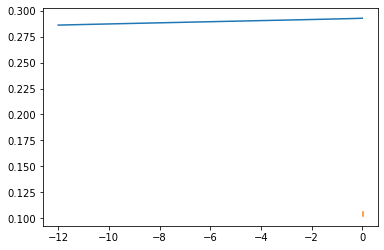

In [182]:
Z=np.linspace(0,-12,50)
dom=[]
for z in Z: dom.append([z, 0.0001,0.3, 1. - Or - Om]) 
plt.plot(Z,model.predict(dom)[:,0],model.predict(dom)[:,1],model.predict(dom)[:,2])

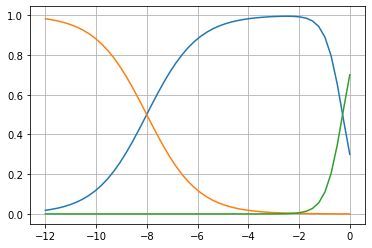

In [12]:
t=np.linspace(0,-12)
X=[]
Or = 0.0001
Om = 0.3
Ol = 1. - Or - Om
plt.plot(t,EDO(t, Or, Om ,Ol))
plt.grid()